In [338]:
#Importing required Libraries
import pandas as pd
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from pyecharts import options as opts
from pyecharts.charts import Bar, Calendar, Tab

In [2]:
#Reading Excel File
df1=pd.read_excel("Omnifytask.xlsx",sheet_name=0)
df2=pd.read_excel("Omnifytask.xlsx",sheet_name=1)

In [3]:
df1

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaN,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaN,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaN,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaN,NaT,USA


In [4]:
df2

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.00,1.0,NaN,2.00,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.00,1.0,NaN,2.00,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.00,1.0,NaN,2.00,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.00,1.0,NaN,2.00,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.00,1.0,NaN,2.00,Capterra,AUSTRALIA,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,04-30-2021,10.00,1.0,NaN,10.75,Capterra,United States,NaN,NaN,NaT
2087,Omnify,Club Management,04-30-2021,1.00,1.0,NaN,12.25,Software Advice,United Kingdom,NaN,NaN,NaT
2088,Omnify,Coaching,04-30-2021,14.67,3.0,NaN,6.00,Capterra,United States,NaN,NaN,NaT
2089,Omnify,Dance Studio,04-30-2021,8.00,1.0,NaN,11.50,Capterra,United Kingdom,NaN,NaN,NaT


In [5]:
print(df1.isna().sum())
print("******************************")
print(df2.isna().sum())

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64
******************************
Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64


In [6]:
df1.columns=['Date', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost', 'Leads', 'Prospects',
       'Payment', 'Payment Date', 'Country']
df2.columns=['Product Name', 'Categories', 'Date of Report', 'Average Position',
       'Clicks', 'Leads', 'Money Spent', 'Channel', 'Location',
       'Prospects', 'Paid', 'Paid Date']

In [7]:
print(df1.dtypes)
print("************************")
print(df2.dtypes)

Date              datetime64[ns]
Campaign                  object
Ad group                  object
Keyword type              object
Search Keyword            object
Currency                  object
Clicks                     int64
Impressions                int64
Cost                     float64
Leads                      int64
Prospects                  int64
Payment                   object
Payment Date      datetime64[ns]
Country                   object
dtype: object
************************
Product Name                object
Categories                  object
Date of Report              object
Average Position           float64
Clicks                     float64
Leads                      float64
Money Spent                float64
Channel                     object
Location                    object
Prospects                  float64
Paid                        object
Paid Date           datetime64[ns]
dtype: object


In [8]:
#Filling NAN's
df1["Payment"]=df1["Payment"].fillna(0)
df1["Search Keyword"]=df1["Search Keyword"].fillna(df1["Search Keyword"].mode())

df2["Money Spent"]=df2["Money Spent"].fillna(np.round(df2["Money Spent"].mean()))
df2["Clicks"]=df2["Clicks"].fillna(df2["Clicks"].median())
df2["Average Position"]=df2["Average Position"].fillna(np.round(df2["Average Position"].mean()))

In [9]:
print(df1.dtypes)
print("*********************")
print(df2.dtypes)

Date              datetime64[ns]
Campaign                  object
Ad group                  object
Keyword type              object
Search Keyword            object
Currency                  object
Clicks                     int64
Impressions                int64
Cost                     float64
Leads                      int64
Prospects                  int64
Payment                   object
Payment Date      datetime64[ns]
Country                   object
dtype: object
*********************
Product Name                object
Categories                  object
Date of Report              object
Average Position           float64
Clicks                     float64
Leads                      float64
Money Spent                float64
Channel                     object
Location                    object
Prospects                  float64
Paid                        object
Paid Date           datetime64[ns]
dtype: object


In [142]:
#Conversion of Dtypes
df1["Payment"]=df1["Payment"].apply(lambda x : re.sub("[$,]","",str(x))).astype("int")
df1["Cost"]=df1["Cost"].astype("int")

df2["Money Spent"]=df2["Money Spent"].astype("int")
df2["Clicks"]=df2["Clicks"].astype("int")
df2["Average Position"]=df2["Average Position"].astype("int")
df2["Date of Report"]=pd.to_datetime(df2["Date of Report"])

In [11]:
#Checking for Duplicates
print(df1.duplicated().sum())
print("************************")
print(df2.duplicated().sum())

0
************************
0


In [12]:
# Extraction of Week,Month,Year from Date Feature
df1["Month"]=df1["Date"].dt.month
df1["Year"]=df1["Date"].dt.year
df1["Week"]=df1["Date"].dt.isocalendar().week

df2["Month"]=df2["Date of Report"].dt.month
df2["Year"]=df2["Date of Report"].dt.year
df2["Week"]=df2["Date of Report"].dt.isocalendar().week

In [13]:
#Create a new feature with name "Returns" in %
df1["Returns"]=np.round(df1["Payment"]/df1["Cost"]).fillna(0).astype("int")

In [114]:
df1["Months"]=df1["Month"].apply(lambda x : "Jan" if x==1 else "Feb" if x==2 else "Mar" if x==3 else "Apr" if x==4 else "May")

In [14]:
df2

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent,Channel,Location,Prospects,Paid,Paid Date,Month,Year,Week
0,Omnify,Coaching,2020-10-20,13,1,NaN,2,Capterra,UNITED STATES,NaN,NaN,NaT,10,2020,43
1,Omnify,Dance Studio,2020-10-20,20,1,NaN,2,Capterra,UNITED KINGDOM,NaN,NaN,NaT,10,2020,43
2,Omnify,Personal Trainer,2020-10-20,6,1,NaN,2,Capterra,SINGAPORE,NaN,NaN,NaT,10,2020,43
3,Omnify,Scheduling,2020-10-20,59,1,NaN,2,GetApp,UNITED STATES,NaN,NaN,NaT,10,2020,43
4,Omnify,Class Registration,2020-10-21,6,1,NaN,2,Capterra,AUSTRALIA,NaN,NaN,NaT,10,2020,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,2021-04-30,10,1,NaN,10,Capterra,United States,NaN,NaN,NaT,4,2021,17
2087,Omnify,Club Management,2021-04-30,1,1,NaN,12,Software Advice,United Kingdom,NaN,NaN,NaT,4,2021,17
2088,Omnify,Coaching,2021-04-30,14,3,NaN,6,Capterra,United States,NaN,NaN,NaT,4,2021,17
2089,Omnify,Dance Studio,2021-04-30,8,1,NaN,11,Capterra,United Kingdom,NaN,NaN,NaT,4,2021,17


In [15]:
df2["Location"].unique()

array(['UNITED STATES', 'UNITED KINGDOM', 'SINGAPORE', 'AUSTRALIA',
       'CANADA', 'Middle East', 'USA', 'UK', 'US', 'United States',
       'Canada', 'Singapore', 'United Kingdom', 'Australia'], dtype=object)

In [19]:
df2["Location"]=df2["Location"].apply(lambda x : "USA" if x in ['UNITED STATES','US','USA','United States'] else "Canada" if x in ["CANADA",'Canada'] else "UK" if x in ['UNITED KINGDOM','UK','United Kingdom'] else "Australia" if x in ["AUSTRALIA","Australia"] else x )

In [20]:
df2["Location"].unique()

array(['USA', 'UK', 'SINGAPORE', 'Australia', 'Canada', 'Middle East',
       'Singapore'], dtype=object)

# Google Ads

In [143]:
df1

,Date,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country,Month,Year,Week,Returns,Months
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38,0,1,980,2021-02-03,USA,1,2021,4,26,Jan
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11,0,0,0,NaT,USA,1,2021,4,0,Jan
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45,0,1,1188,2021-03-13,USA,1,2021,4,26,Jan
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23,0,0,0,NaT,USA,1,2021,4,0,Jan
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4,0,0,0,NaT,USA,1,2021,4,0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0,0,0,0,NaT,USA,5,2021,18,0,May
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0,0,0,0,NaT,USA,5,2021,18,0,May
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0,0,0,0,NaT,USA,5,2021,18,0,May
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0,0,0,0,NaT,USA,5,2021,18,0,May


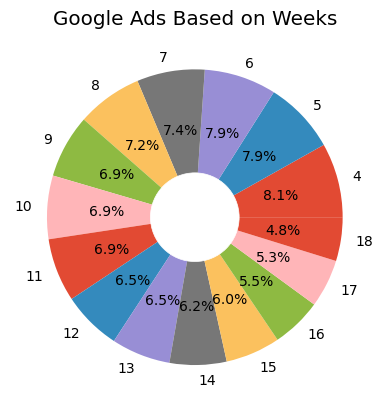

In [122]:

plt.pie(df1['Week'].value_counts(),autopct="%1.1f%%",labels=df1["Week"].unique())
plt.title("Google Ads Based on Weeks")

my_circle=plt.Circle( (0,0),(0.3) , color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

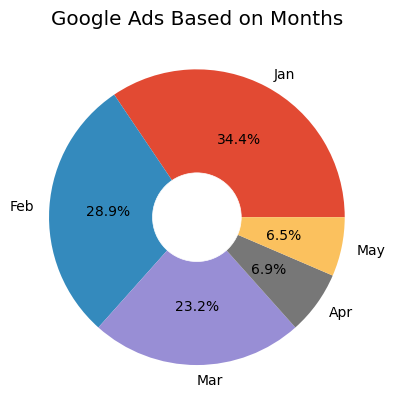

In [117]:
plt.pie(df1['Month'].value_counts(),autopct="%1.1f%%",labels=df1["Months"].unique())
plt.title("Google Ads Based on Months")

my_circle=plt.Circle( (0,0),(0.3) , color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

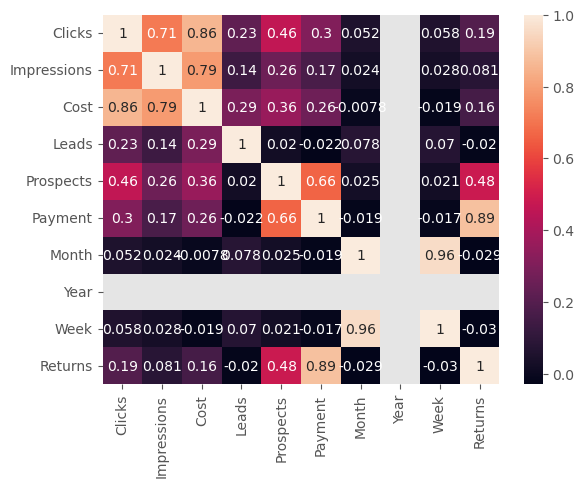

In [123]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [196]:
group_by_month=df1.groupby(by=["Month"]).sum()[["Cost","Returns"]]
group_by_month

,Cost,Returns
Month,,
1,150,52
2,816,193
3,1038,71
4,485,122
5,222,18


In [347]:
bar_chart_month=(Bar(init_opts=opts.InitOpts(width='800px',height='400px',theme='light',bg_color='white'))
                 .add_xaxis(group_by_month.index.to_list())
                 .add_yaxis("Cost",group_by_month["Cost"].round().to_list())
                 .add_yaxis("Returns",group_by_month["Returns"].round().to_list())
                .set_global_opts(opts.TitleOpts(title="Cost & Returns By Month",subtitle="in USD"))
                )

In [348]:
bar_chart_month.render_notebook()

In [368]:
group_by_week=df1.groupby(by=["Week"]).sum()[["Cost","Payment","Returns"]]
group_by_week

,Cost,Payment,Returns
Week,,,
4,150,2168,52
5,188,0,0
6,211,980,81
7,232,1788,112
8,185,0,0
9,138,980,23
10,253,0,0
11,179,0,0
12,303,2388,48


In [369]:
bar_chart_week=(Bar()
                 .add_xaxis(group_by_week.index.to_list())
                 .add_yaxis("Cost",group_by_week["Cost"].round().to_list())
                 .add_yaxis("Returns",group_by_week["Returns"].round().to_list())
                .set_global_opts(opts.TitleOpts(title="Cost & Payment By Week",subtitle="in USD"))
                )
bar_chart_week.render_notebook()

In [352]:
group_by_sub=df1.groupby(by=df1["Campaign"],as_index=False).sum().sort_values(by=["Returns"])
group_by_sub

,Campaign,Clicks,Impressions,Cost,Leads,Prospects,Payment,Month,Year,Week,Returns
0,EK_Generic_Quad-Tok_Pilates,10,414,98,0,0,0,71,40420,269,0
2,EK_Generic_Quad-Tok_Yoga_Singapore,1,34,6,0,0,0,21,18189,72,0
4,EK_Generic_Swimming_Canada,6,44,16,0,0,0,58,40420,215,0
5,EK_Generic_Swimming_Singapore,25,116,25,0,0,0,45,22231,175,0
7,EK_Generic_Tri-Tok_Pilates,4,19,39,0,0,0,82,44462,320,0
9,EK_Generic_Tri-Tok_Reservation_Canada,17,191,155,1,1,0,57,48504,195,0
10,EK_Generic_Tri-Tok_Reservation_Singapore,1,45,11,0,0,0,42,38399,143,0
11,EK_Generic_Tri-Tok_Reservation_UAE,1,22,5,0,0,0,58,50525,198,0
12,EK_Generic_Tri-Tok_Reservation_UK,12,277,164,0,0,0,67,54567,230,0
14,EK_Generic_Tri-Tok_Yoga_Singapore,0,1,0,0,0,0,6,4042,22,0


In [259]:
bar_chart_sub=(
     Bar(init_opts=opts.InitOpts(width='2500px',height='600px',theme='light',bg_color='white'))
    .add_xaxis(group_by_sub["Campaign"].to_list())
    .add_yaxis("Clicks",group_by_sub["Clicks"].round().to_list())
    .add_yaxis("Prospects",group_by_sub["Prospects"].round().to_list())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(opts.TitleOpts(title="Clicks & Prospects By Campaign"))
    



)

In [260]:

bar_chart_sub.render_notebook()

In [216]:
returns_by_date=df1.groupby(by="Date").sum()[["Returns","Cost"]].round(0)
returns_by_date=returns_by_date.reset_index()
returns_by_date

,Date,Returns,Cost
0,2021-01-25,52,150
1,2021-02-01,0,188
2,2021-02-08,81,211
3,2021-02-15,112,232
4,2021-02-22,0,185
5,2021-03-01,23,138
6,2021-03-08,0,253
7,2021-03-15,0,179
8,2021-03-22,48,303
9,2021-03-29,0,165


In [238]:
bar_chart_date=(
     Bar(init_opts=opts.InitOpts(width='1500px',height='1000px',theme='light',bg_color='white'))
    .add_xaxis(returns_by_date["Date"].to_list())
    .add_yaxis("Cost",returns_by_date["Cost"].round().to_list())
    .add_yaxis("Returns",returns_by_date["Returns"].round().to_list())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(opts.TitleOpts(title="Cost & Returns By Date"))
        )
        


In [239]:
bar_chart_date.render_notebook()

# Listing Sites

In [263]:
df2

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent,Channel,Location,Prospects,Paid,Paid Date,Month,Year,Week
0,Omnify,Coaching,2020-10-20,13,1,NaN,2,Capterra,USA,NaN,NaN,NaT,10,2020,43
1,Omnify,Dance Studio,2020-10-20,20,1,NaN,2,Capterra,UK,NaN,NaN,NaT,10,2020,43
2,Omnify,Personal Trainer,2020-10-20,6,1,NaN,2,Capterra,SINGAPORE,NaN,NaN,NaT,10,2020,43
3,Omnify,Scheduling,2020-10-20,59,1,NaN,2,GetApp,USA,NaN,NaN,NaT,10,2020,43
4,Omnify,Class Registration,2020-10-21,6,1,NaN,2,Capterra,Australia,NaN,NaN,NaT,10,2020,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,2021-04-30,10,1,NaN,10,Capterra,USA,NaN,NaN,NaT,4,2021,17
2087,Omnify,Club Management,2021-04-30,1,1,NaN,12,Software Advice,UK,NaN,NaN,NaT,4,2021,17
2088,Omnify,Coaching,2021-04-30,14,3,NaN,6,Capterra,USA,NaN,NaN,NaT,4,2021,17
2089,Omnify,Dance Studio,2021-04-30,8,1,NaN,11,Capterra,UK,NaN,NaN,NaT,4,2021,17


In [289]:
df2.isnull().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       0
Clicks                 0
Leads               1928
Money Spent            0
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
Month                  0
Year                   0
Week                   0
dtype: int64

In [264]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   datetime64[ns]
 3   Average Position  2091 non-null   int32         
 4   Clicks            2091 non-null   int32         
 5   Leads             163 non-null    float64       
 6   Money Spent       2091 non-null   int32         
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
 12  Month             2091 non-null   int64         
 13  Year              2091 non-null   int64         
 14  Week              2091 n

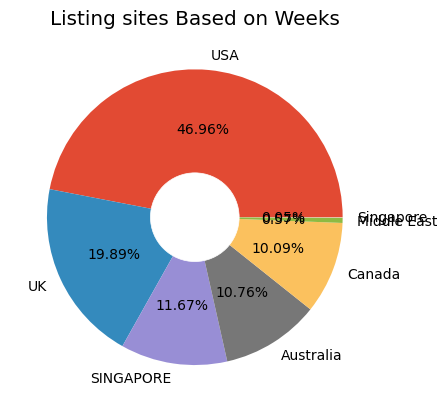

In [337]:
plt.pie(df2['Location'].value_counts(),autopct="%1.2f%%",labels=df2["Location"].unique())
plt.title("Listing sites Based on Weeks")

my_circle=plt.Circle( (0,0),(0.3) , color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [267]:
group_by_channel=df2.groupby(by=df2["Channel"]).sum().sort_values(by=["Money Spent"])
group_by_channel

,Average Position,Clicks,Leads,Money Spent,Prospects,Month,Year,Week
Channel,,,,,,,,
Software Advice,437,61,4.0,304,3.0,364,111131,1497
GetApp,10734,1039,44.0,5292,15.0,5048,1666995,21161
Capterra,11208,2378,138.0,19176,50.0,7257,2446976,30282


In [357]:
bar_chart_channel=(Bar(init_opts=opts.InitOpts(width='1000px',height='300px',theme='light',bg_color='white'))
                 .add_xaxis(group_by_channel.index.to_list())
                 .add_yaxis("Money Spent",group_by_channel["Money Spent"].round().to_list())
                 .add_yaxis("Average Position",group_by_channel["Average Position"].round().to_list())
                 .add_yaxis("Clicks",group_by_channel["Clicks"].round().to_list())
                .set_global_opts(opts.TitleOpts(title="Profitable Channel",subtitle="Clicks,Money Spent & Average Position "))
                )

In [358]:
bar_chart_channel.reversal_axis()
bar_chart_channel.render_notebook()

In [296]:
by_date=df2.groupby(by="Date of Report").sum()[["Money Spent","Clicks","Average Position"]].round()
by_date=by_date.reset_index()
by_date

,Date of Report,Money Spent,Clicks,Average Position
0,2020-10-20,8,4,98
1,2020-10-21,16,8,165
2,2020-10-22,4,2,49
3,2020-10-23,16,8,72
4,2020-10-24,16,8,108
...,...,...,...,...
185,2021-08-04,135,19,165
186,2021-09-04,118,13,112
187,2021-10-04,93,13,124
188,2021-11-04,111,11,40


In [359]:
bar_date=(
     Bar(init_opts=opts.InitOpts(width='1500px',height='1500px',theme='light',bg_color='white'))
    .add_xaxis(by_date["Date of Report"].to_list())
    .add_yaxis("Money Spent",by_date["Money Spent"].round().to_list())
    .add_yaxis("Clicks",by_date["Clicks"].round().to_list())
    .add_yaxis("Average position",by_date["Average Position"].round().to_list())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(opts.TitleOpts(title="Clicks,Money Spent & Average Position By Date"))
        )
        

In [360]:
bar_date.render_notebook()

In [317]:
by_dates=df2.groupby(by="Date of Report").sum()[["Week","Month","Year"]].round()
by_dates=by_dates.reset_index()
by_dates

,Date of Report,Week,Month,Year
0,2020-10-20,172,40,8080
1,2020-10-21,344,80,16160
2,2020-10-22,86,20,4040
3,2020-10-23,301,70,14140
4,2020-10-24,344,80,16160
...,...,...,...,...
185,2021-08-04,403,104,26273
186,2021-09-04,315,81,18189
187,2021-10-04,400,100,20210
188,2021-11-04,352,88,16168


In [326]:
bar_dates=(
     Bar(init_opts=opts.InitOpts(width='1500px',height='1200px'))
    .add_xaxis(by_dates["Date of Report"].to_list())
    .add_yaxis("Week",by_dates["Week"].round().to_list())
    .add_yaxis("Month",by_dates["Month"].round().to_list())
    .add_yaxis("Year",by_dates["Year"].round().to_list())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(opts.TitleOpts(title="Week, Month & Year Position By Date"))
        )
        

In [327]:
bar_dates.render_notebook()

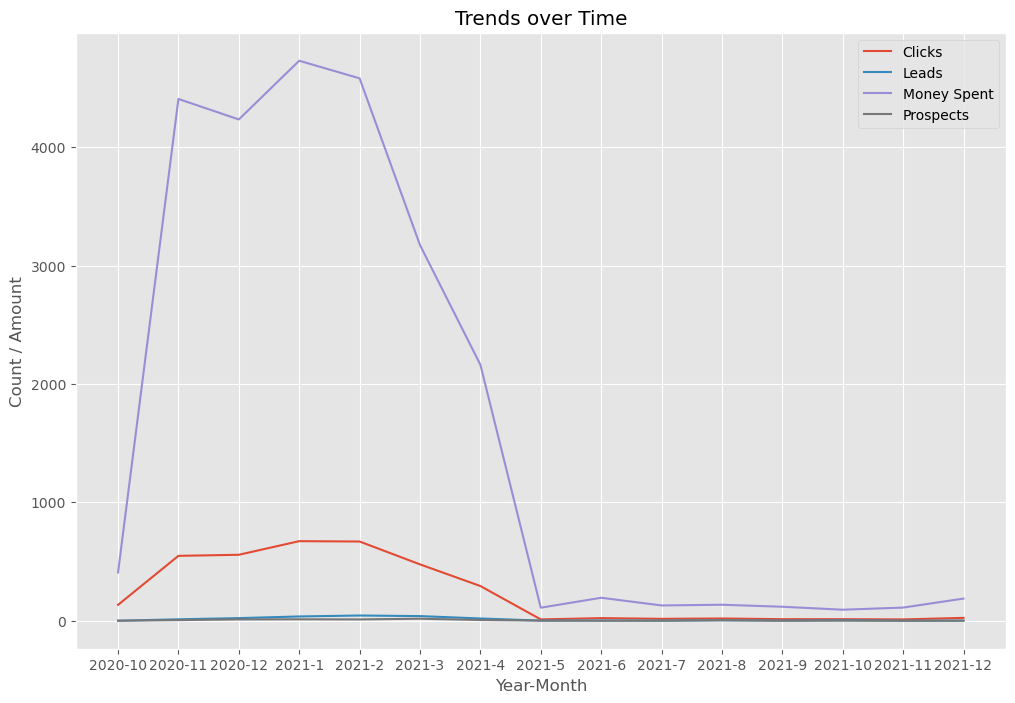

In [367]:
# Group the data by 'Year' and 'Month' to get insights over time
monthly_data = df2.groupby(['Year', 'Month']).agg({
    'Clicks': 'sum',
    'Leads': 'sum',
    'Money Spent': 'sum',
    'Prospects': 'sum'
}).reset_index()

# Visualize the trends in 'Clicks', 'Leads', 'Money Spent', and 'Prospects' over time
plt.figure(figsize=(12, 8))
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Clicks'], label='Clicks')
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Leads'], label='Leads')
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Money Spent'], label='Money Spent')
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Prospects'], label='Prospects')
plt.xlabel('Year-Month')
plt.ylabel('Count / Amount')
plt.title('Trends over Time')
plt.legend()
plt.show()

In [329]:
by_country=df2.groupby(by="Location").sum()[["Clicks","Money Spent","Average Position"]].round()
by_country=by_country.reset_index()
by_country

,Location,Clicks,Money Spent,Average Position
0,Australia,279,1189,2503
1,Canada,251,1335,2931
2,Middle East,1,12,1
3,SINGAPORE,454,2025,796
4,Singapore,17,139,22
5,UK,713,4285,4919
6,USA,1763,15787,11207


In [361]:
bar_country=(
     Bar(init_opts=opts.InitOpts(width='1000px',height='1000px',theme='light',bg_color='white'))
    .add_xaxis(by_country["Location"].to_list())
    .add_yaxis("Money Spent",by_country["Money Spent"].round().to_list())
    .add_yaxis("Clicks",by_country["Clicks"].round().to_list())
    .add_yaxis("Average position",by_country["Average Position"].round().to_list())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(opts.TitleOpts(title="By Country",subtitle="Based on Clicks,Money Spent & Average Position "))
        )

bar_country.render_notebook()

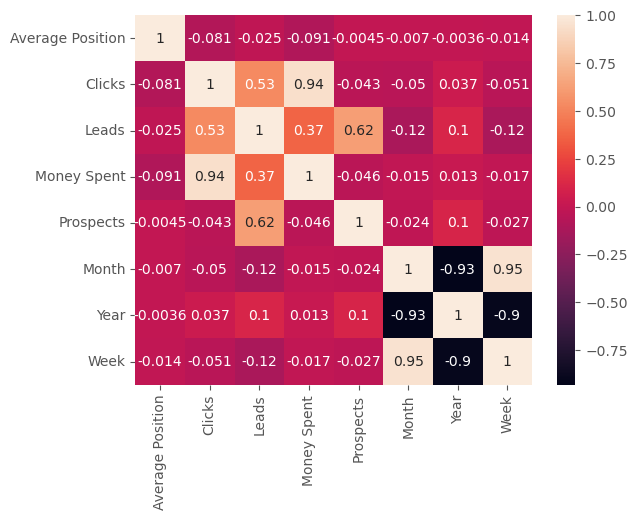

In [332]:
sns.heatmap(df2.corr(),annot=True)
plt.show()